# Time Series Test Plan Demo

In [1]:
import pandas as pd

In [2]:
import validmind as vm

vm.init(
  api_host = "http://localhost:3000/api/v1/tracking",
  api_key = "e22b89a6b9c2a27da47cb0a09febc001",
  api_secret = "a61be901b5596e3c528d94231e4a3c504ef0bb803d16815f8dfd6857fac03e57",
  project = "clg4hlb8d0046jn8hwqnes4ak"
)
  

True

In [3]:
df = pd.read_csv("../datasets/lending_club_loan_rates.csv", sep='\t')

In [4]:
df.head()

,Unnamed: 0,loan_rate_A,loan_rate_B,loan_rate_C,loan_rate_D,FEDFUNDS,diff1_loan_rate_A,diff1_loan_rate_B,diff1_loan_rate_C,diff1_loan_rate_D,diff1_FEDFUNDS,diff2_FEDFUNDS
0,2007-08-01,7.766667,9.497692,10.947500,12.267000,5.02,0.060000,0.134359,0.207500,-0.467444,-0.24,-0.25
1,2007-09-01,7.841429,9.276667,10.829167,12.436667,4.94,0.074762,-0.221026,-0.118333,0.169667,-0.08,0.16
2,2007-10-01,7.830000,9.433333,10.825926,12.737368,4.76,-0.011429,0.156667,-0.003241,0.300702,-0.18,-0.10
3,2007-11-01,7.779091,9.467778,10.967037,12.609444,4.49,-0.050909,0.034444,0.141111,-0.127924,-0.27,-0.09
4,2007-12-01,7.695833,9.387500,10.805000,12.478889,4.24,-0.083258,-0.080278,-0.162037,-0.130556,-0.25,0.02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         137 non-null    object 
 1   loan_rate_A        137 non-null    float64
 2   loan_rate_B        137 non-null    float64
 3   loan_rate_C        137 non-null    float64
 4   loan_rate_D        137 non-null    float64
 5   FEDFUNDS           137 non-null    float64
 6   diff1_loan_rate_A  137 non-null    float64
 7   diff1_loan_rate_B  137 non-null    float64
 8   diff1_loan_rate_C  137 non-null    float64
 9   diff1_loan_rate_D  137 non-null    float64
 10  diff1_FEDFUNDS     137 non-null    float64
 11  diff2_FEDFUNDS     137 non-null    float64
dtypes: float64(11), object(1)
memory usage: 13.0+ KB


In [6]:
df = df.rename(columns={'Unnamed: 0': 'Date'})
df = df.set_index(pd.to_datetime(df['Date']))
df.drop(["Date"], axis=1, inplace=True)
df

,loan_rate_A,loan_rate_B,loan_rate_C,loan_rate_D,FEDFUNDS,diff1_loan_rate_A,diff1_loan_rate_B,diff1_loan_rate_C,diff1_loan_rate_D,diff1_FEDFUNDS,diff2_FEDFUNDS
Date,,,,,,,,,,,
2007-08-01,7.766667,9.497692,10.947500,12.267000,5.02,0.060000,0.134359,0.207500,-0.467444,-0.24,-0.25
2007-09-01,7.841429,9.276667,10.829167,12.436667,4.94,0.074762,-0.221026,-0.118333,0.169667,-0.08,0.16
2007-10-01,7.830000,9.433333,10.825926,12.737368,4.76,-0.011429,0.156667,-0.003241,0.300702,-0.18,-0.10
2007-11-01,7.779091,9.467778,10.967037,12.609444,4.49,-0.050909,0.034444,0.141111,-0.127924,-0.27,-0.09
2007-12-01,7.695833,9.387500,10.805000,12.478889,4.24,-0.083258,-0.080278,-0.162037,-0.130556,-0.25,0.02
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,7.218997,11.161286,15.142618,19.857603,1.91,0.052118,0.045181,0.056796,0.088167,0.00,-0.09
2018-09-01,7.201281,11.191918,15.139769,19.748459,1.95,-0.017716,0.030632,-0.002849,-0.109144,0.04,0.04
2018-10-01,7.228498,11.208418,15.129105,19.792163,2.19,0.027218,0.016500,-0.010665,0.043704,0.24,0.20


In [7]:
vm_dataset = vm.init_dataset(
    dataset=df
)

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


In [8]:
vm.test_plans.list_plans()

ID,Name,Description
sklearn_classifier_metrics,SKLearnClassifierMetrics,Test plan for sklearn classifier metrics
sklearn_classifier_validation,SKLearnClassifierPerformance,Test plan for sklearn classifier models
sklearn_classifier,SKLearnClassifier,Test plan for sklearn classifier models that includes both metrics and validation tests
tabular_dataset,TabularDataset,Test plan for generic tabular datasets
tabular_dataset_description,TabularDatasetDescription,Test plan to extract metadata and descriptive statistics from a tabular dataset
tabular_data_quality,TabularDataQuality,Test plan for data quality on tabular datasets
normality_test_plan,NormalityTestPlan,Test plan to perform normality tests.
autocorrelation_test_plan,AutocorrelationTestPlan,Test plan to perform autocorrelation tests.
seasonality_test_plan,SesonalityTestPlan,Test plan to perform seasonality tests.
stationarity_test_plan,StationarityTestPlan,Test plan to perform stationarity tests.



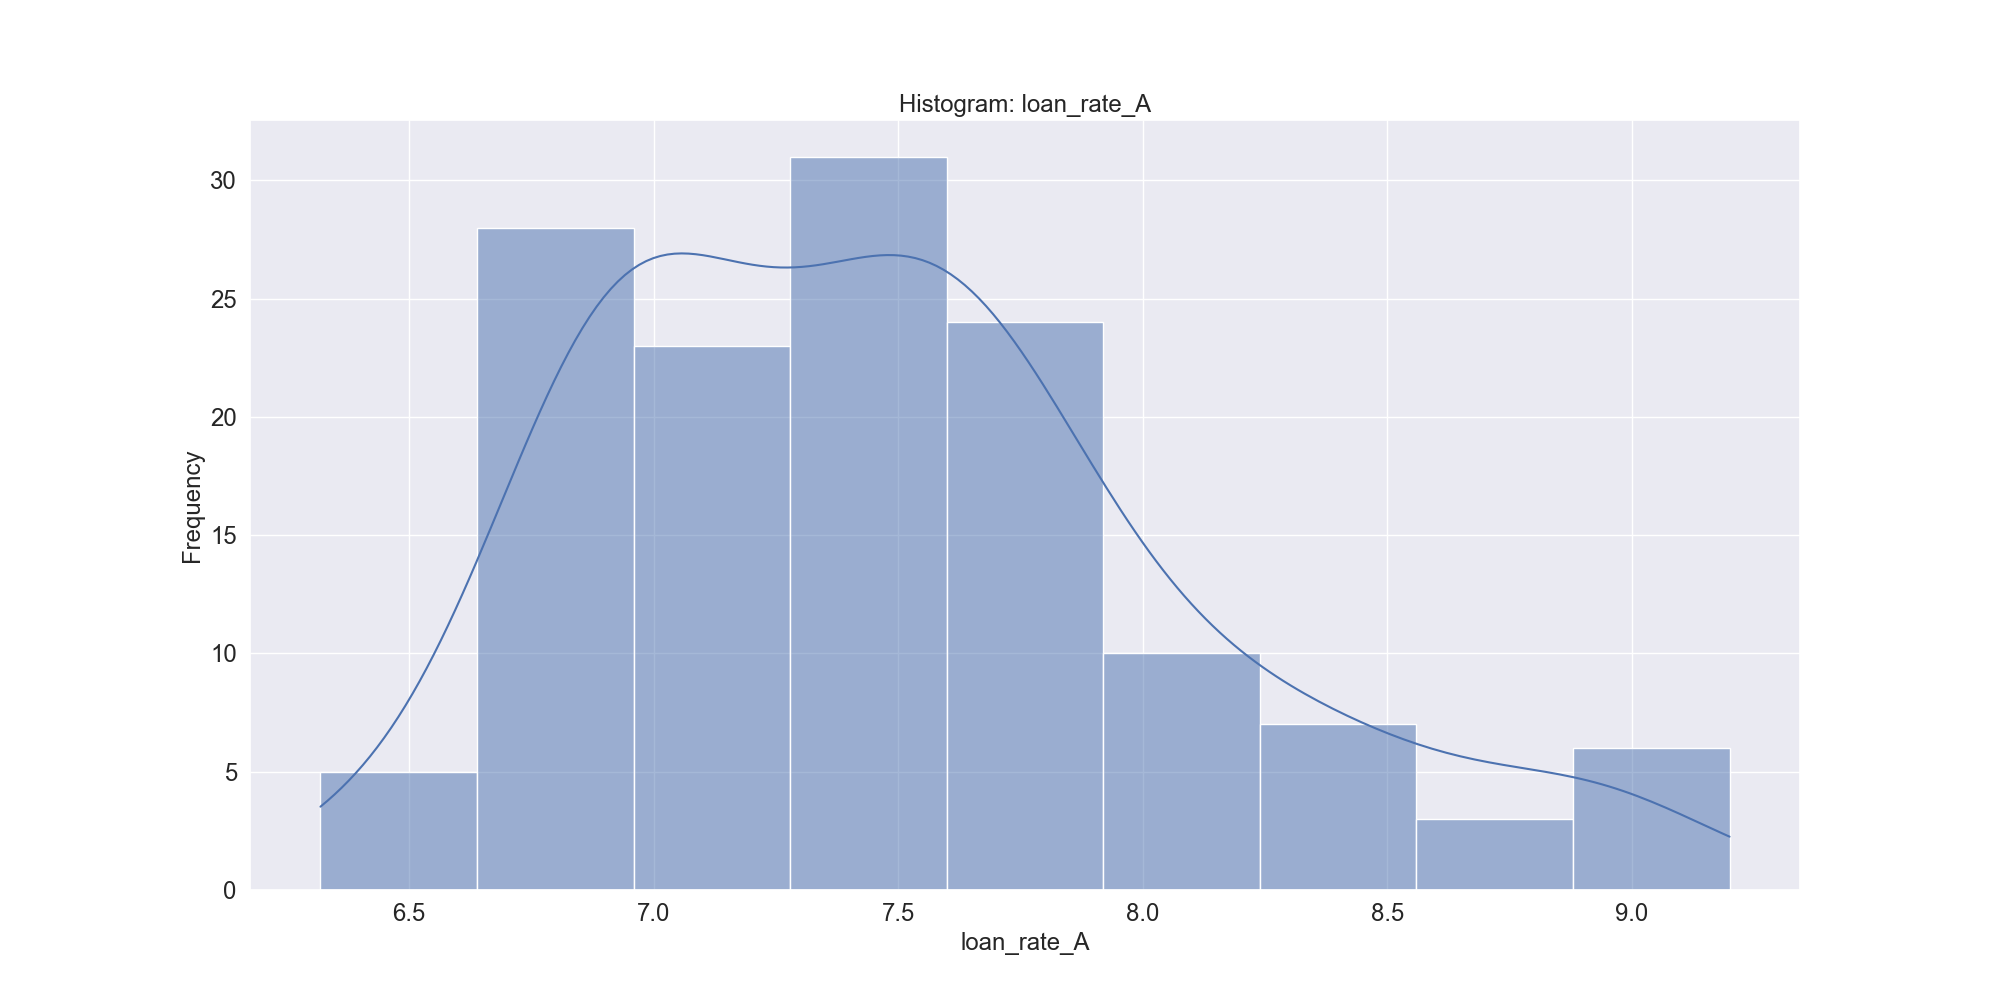
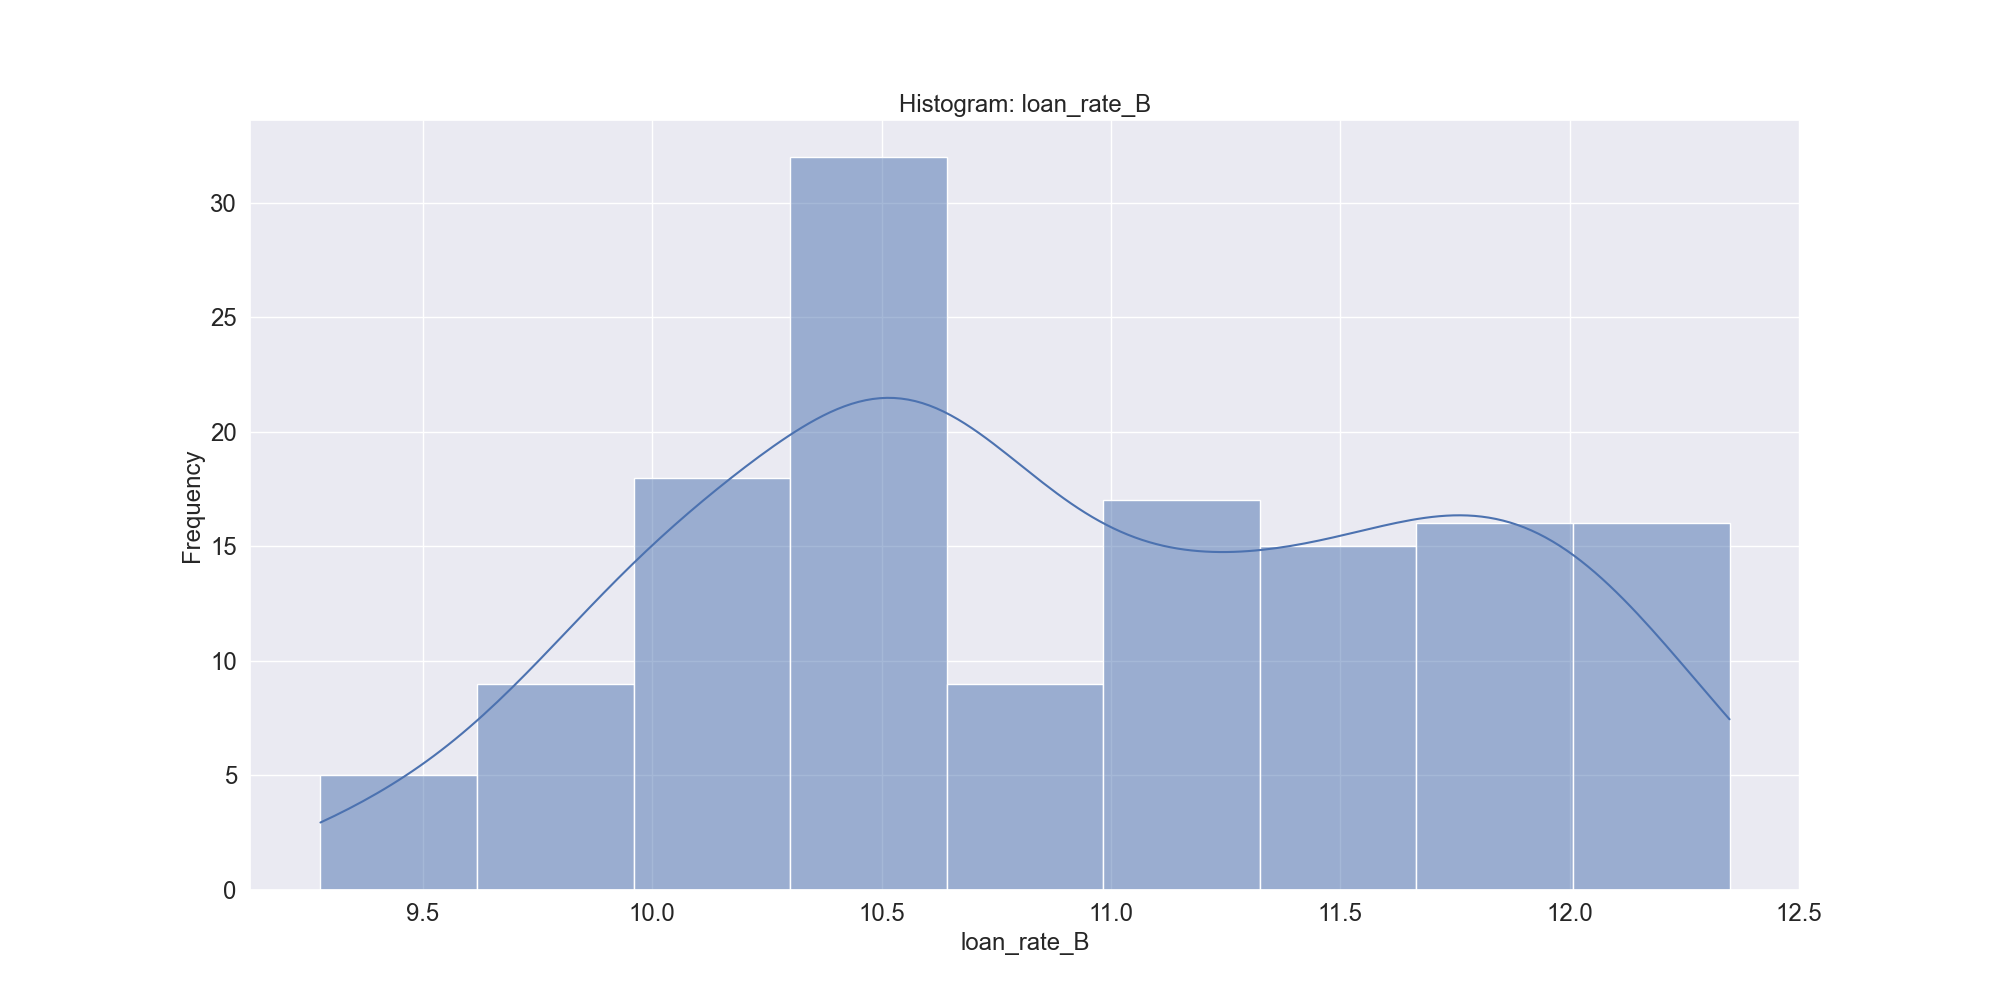
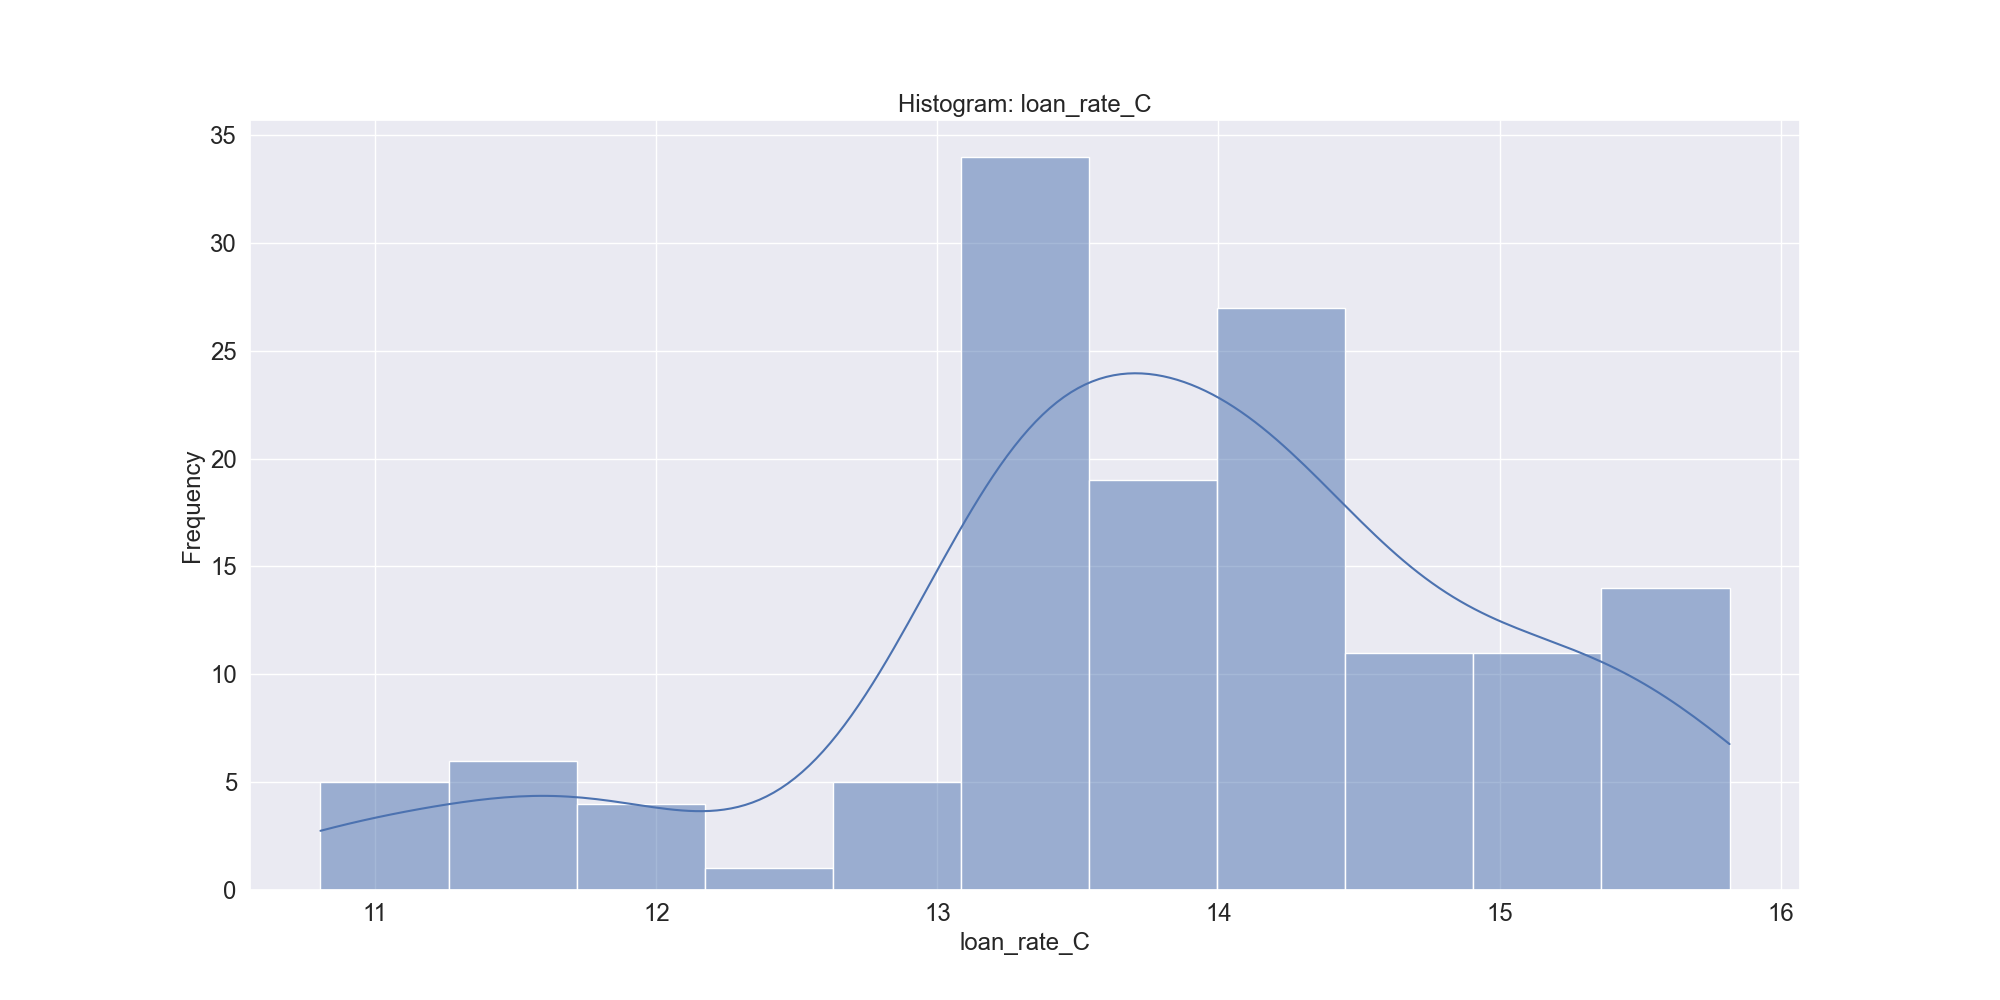
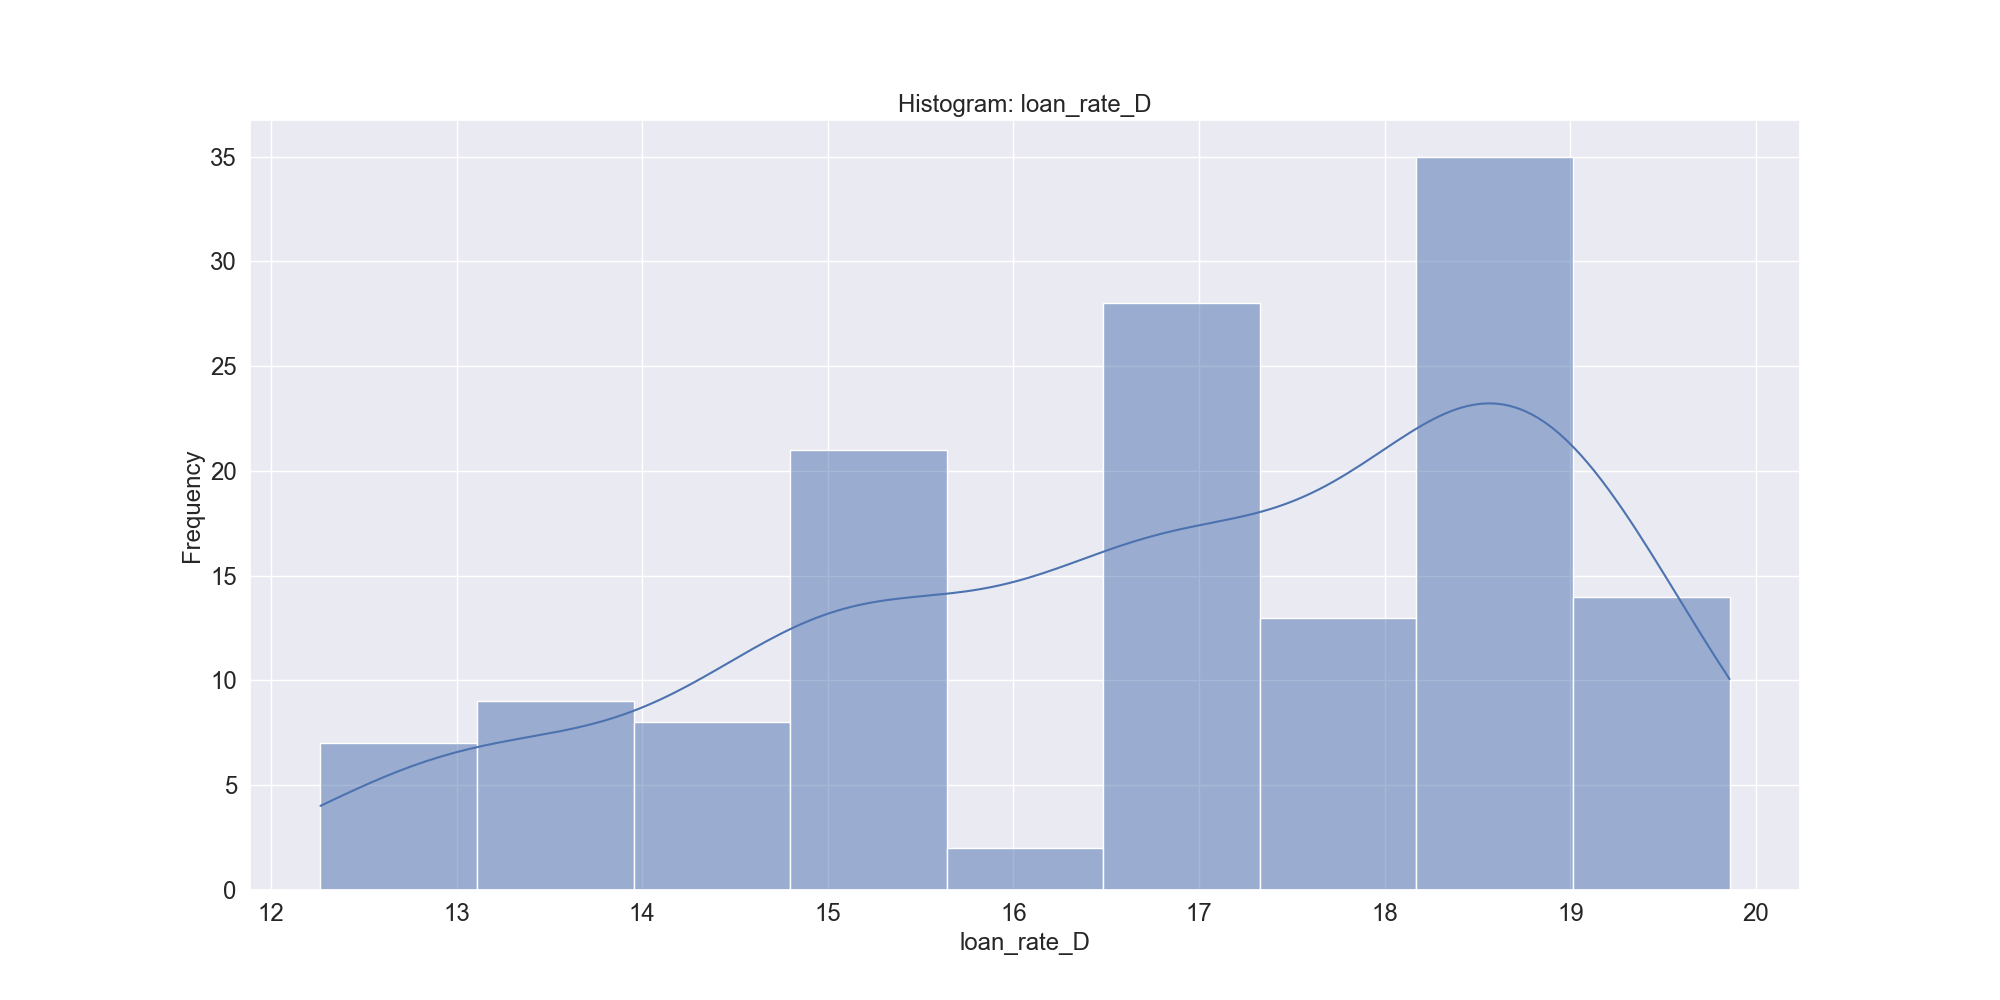
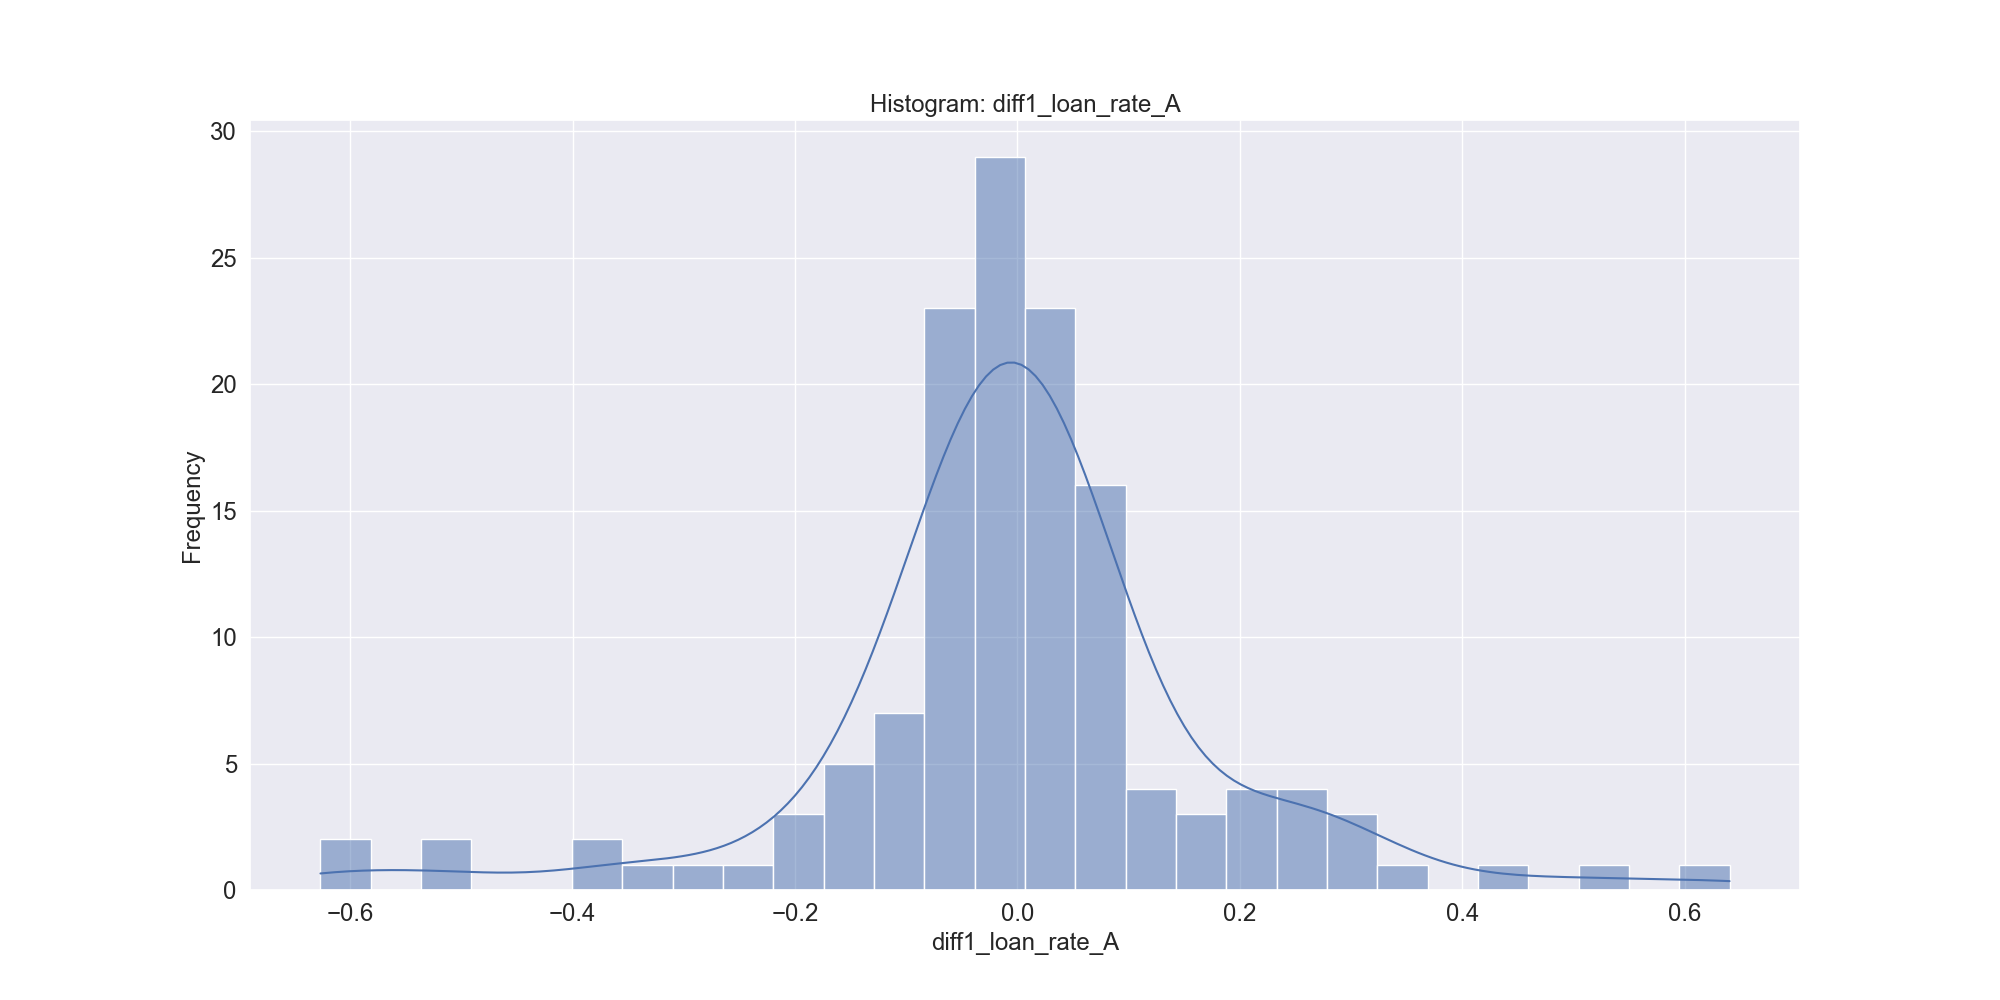
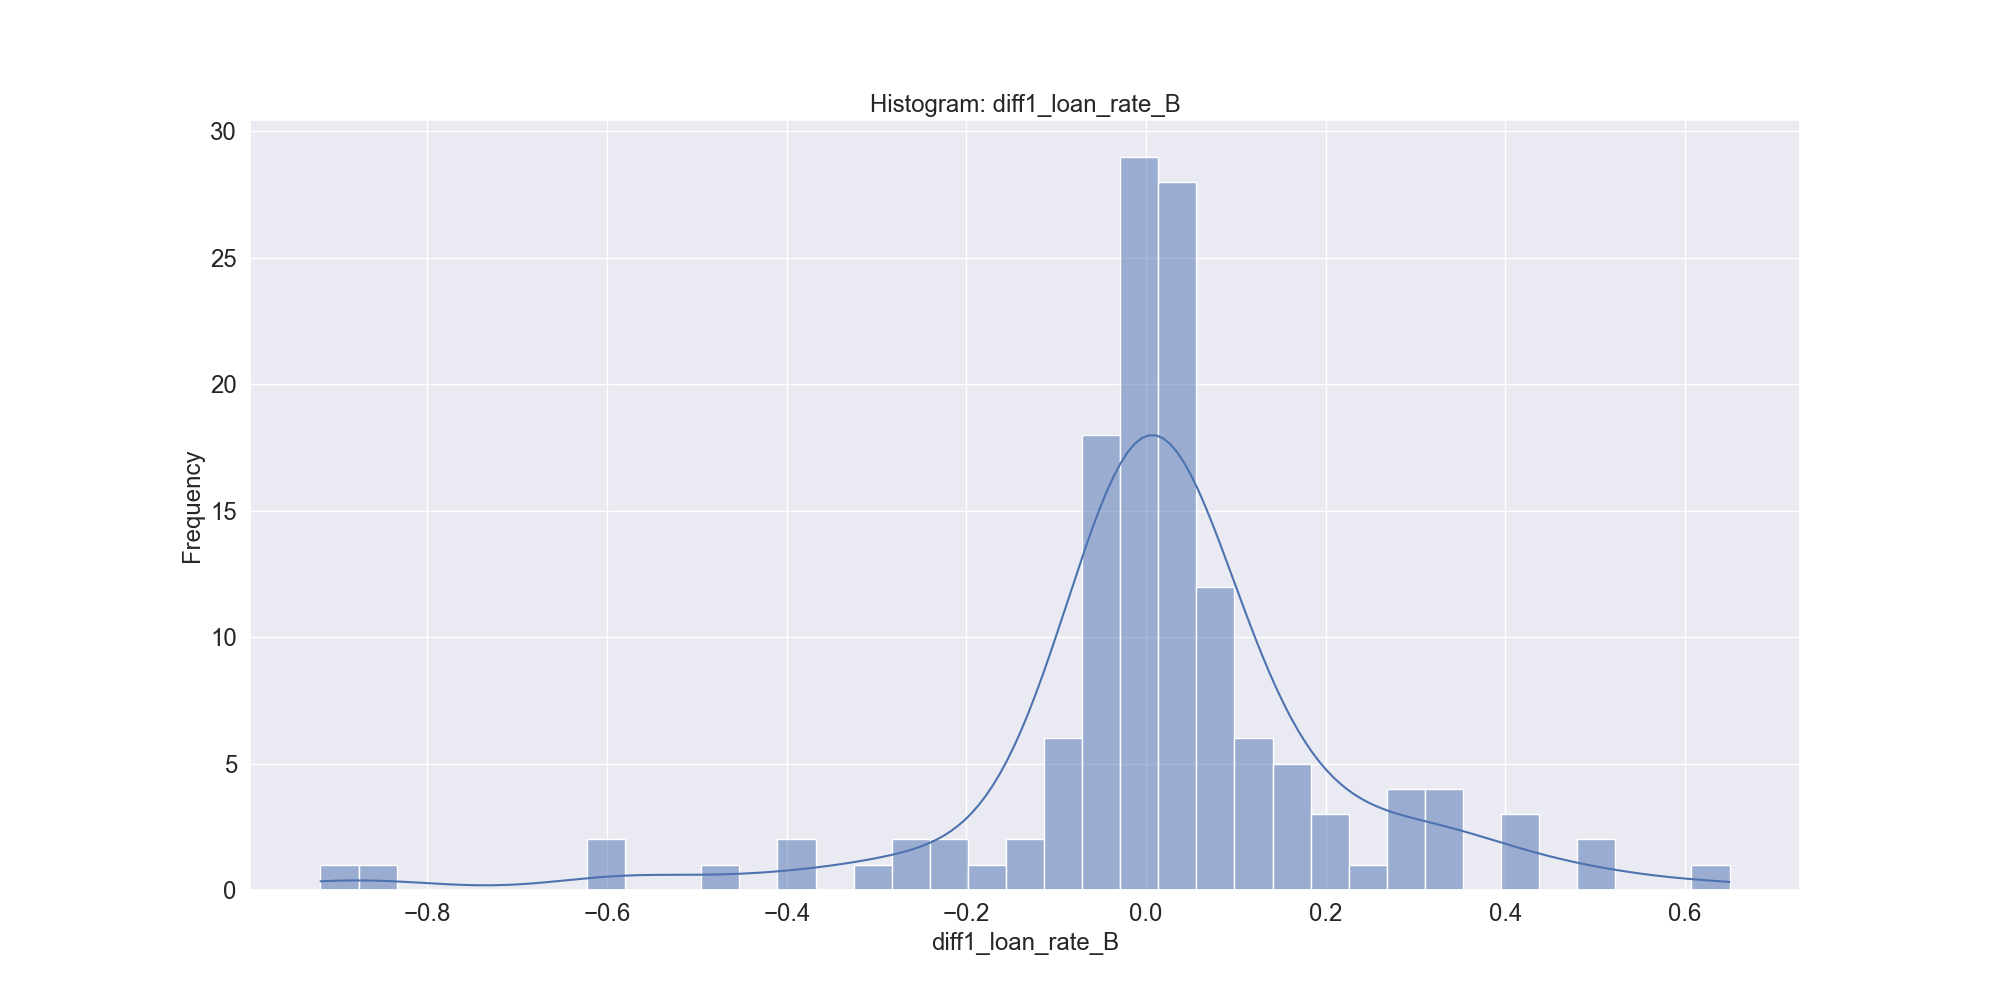
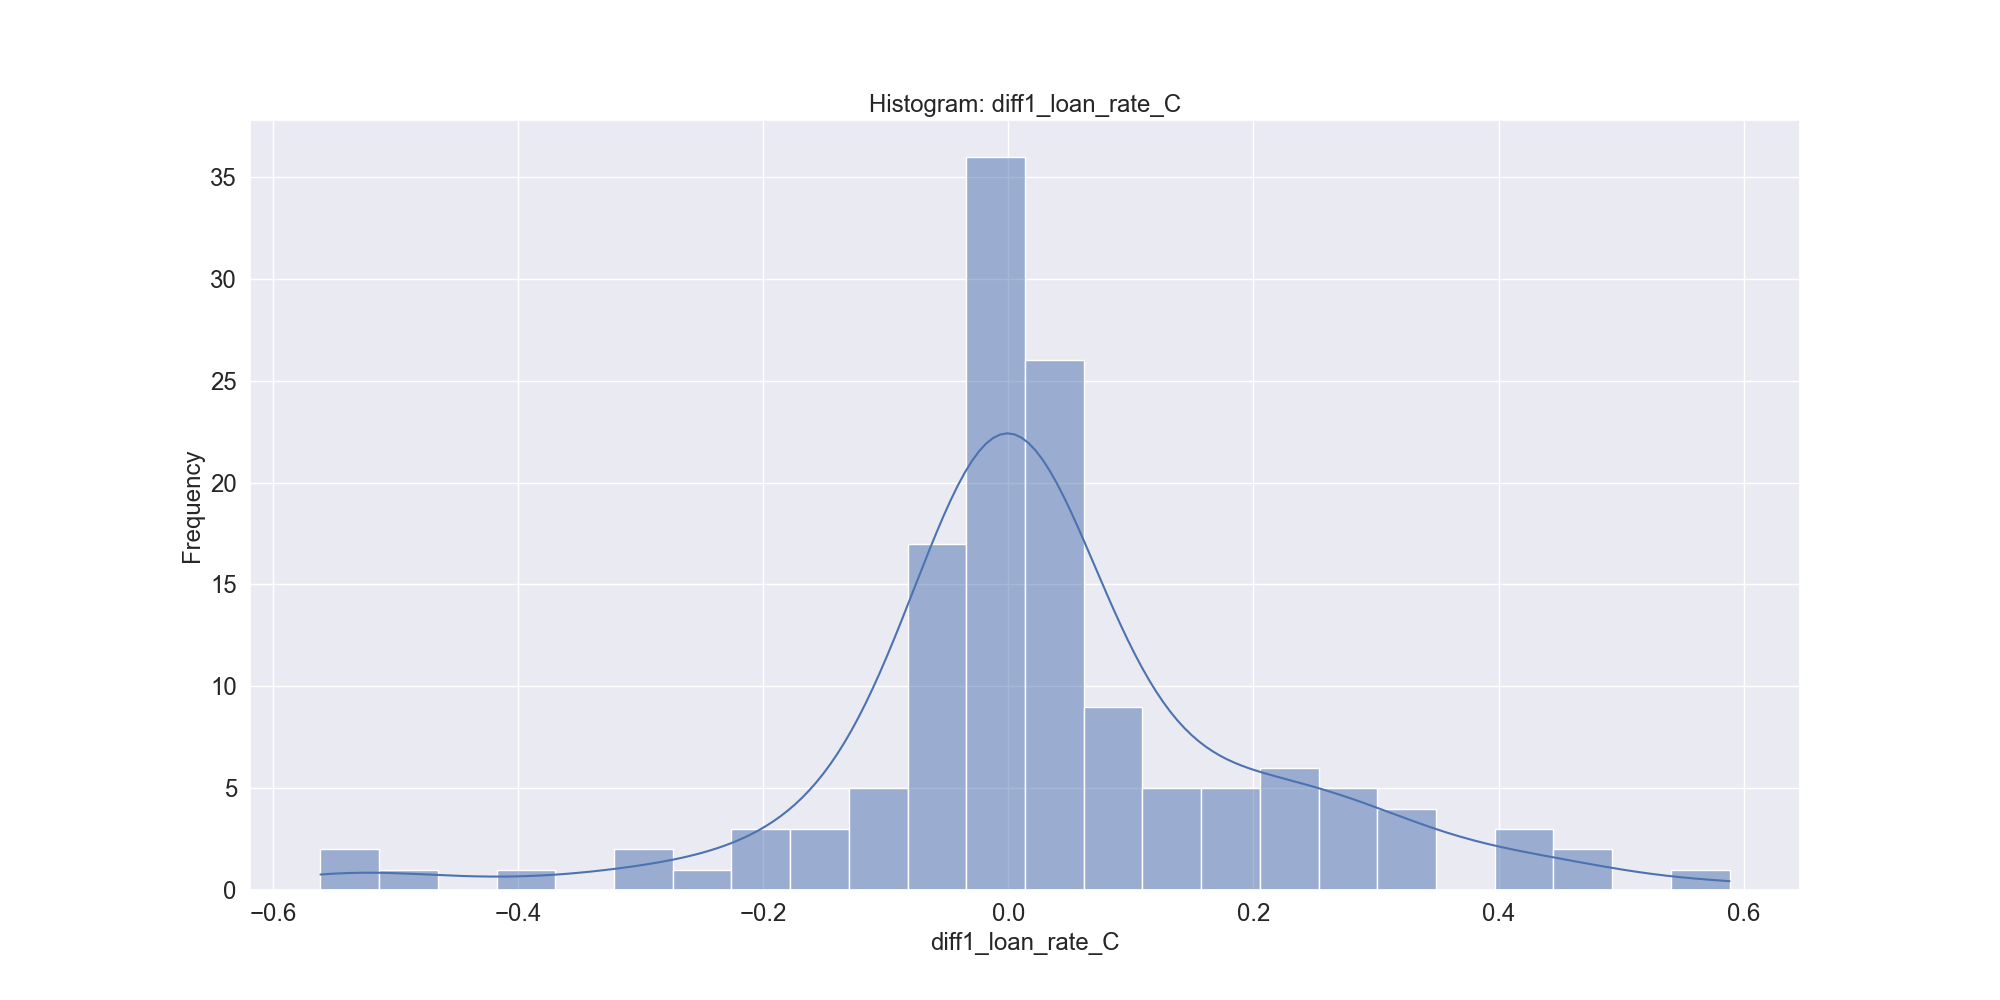
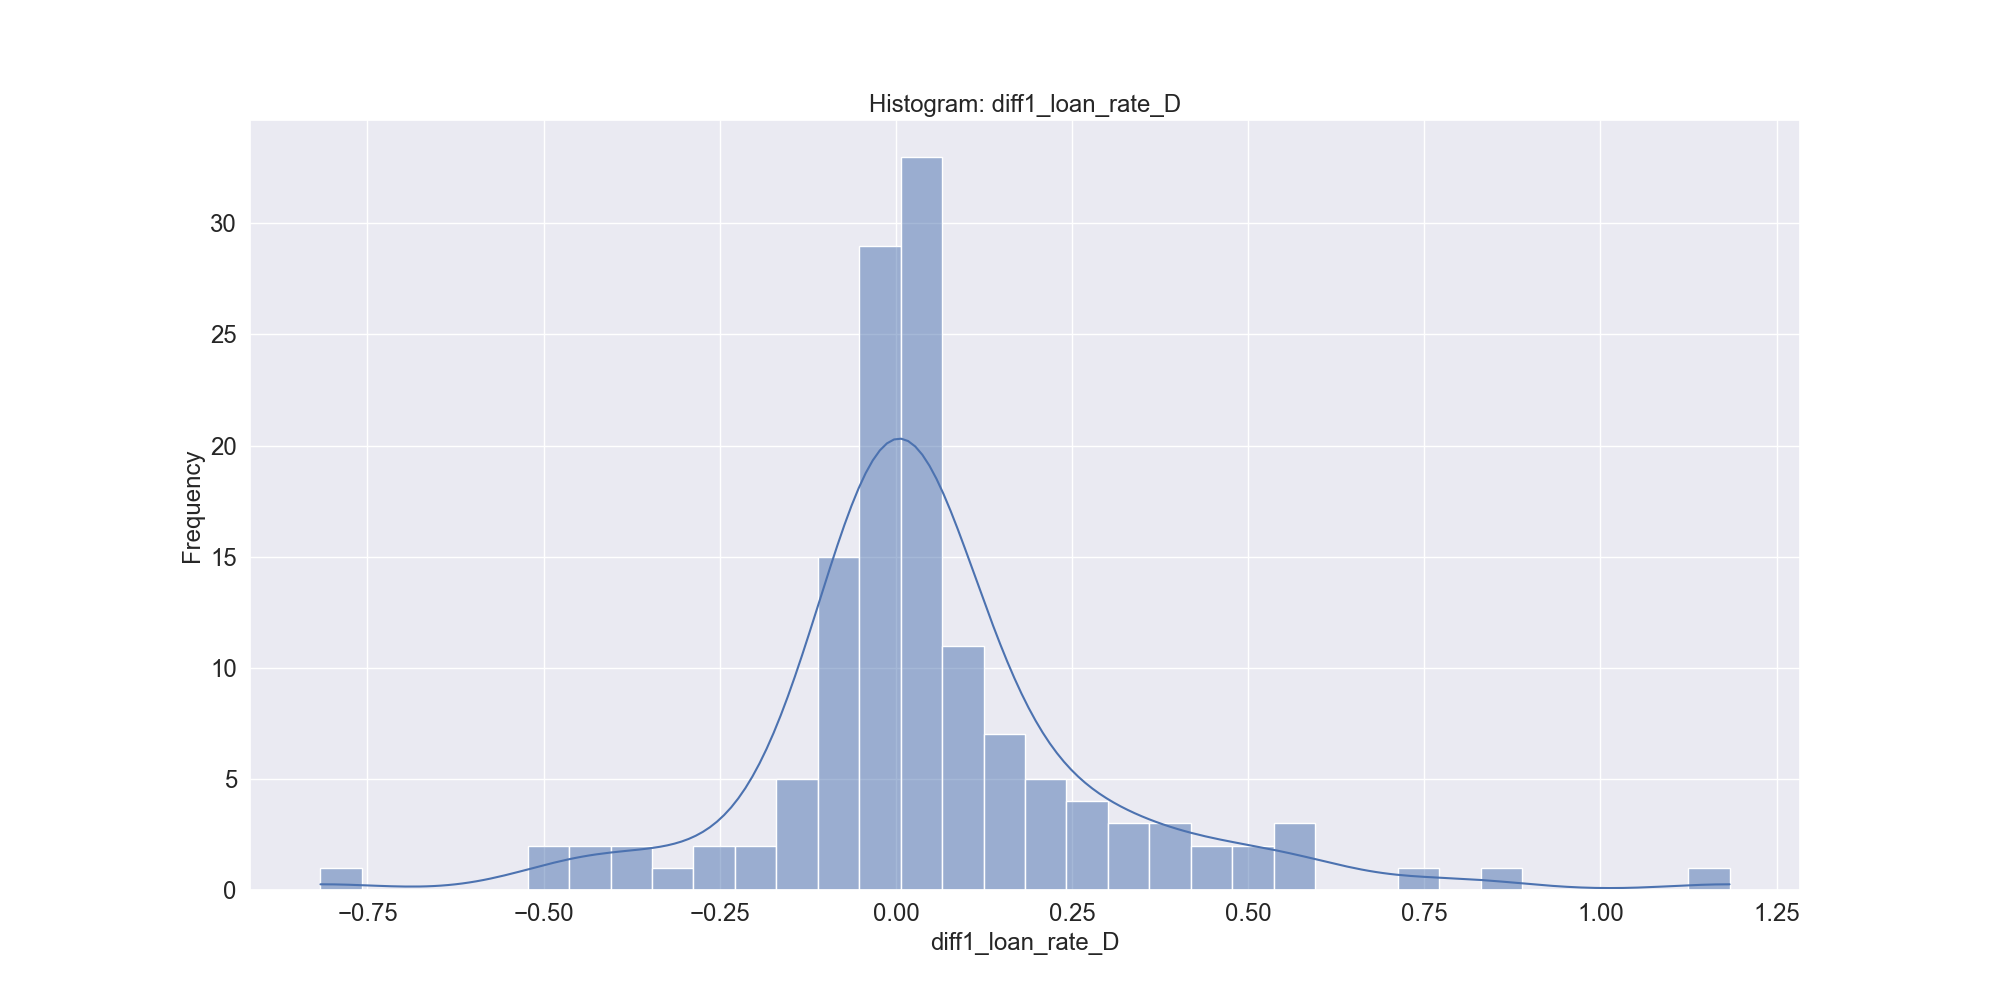
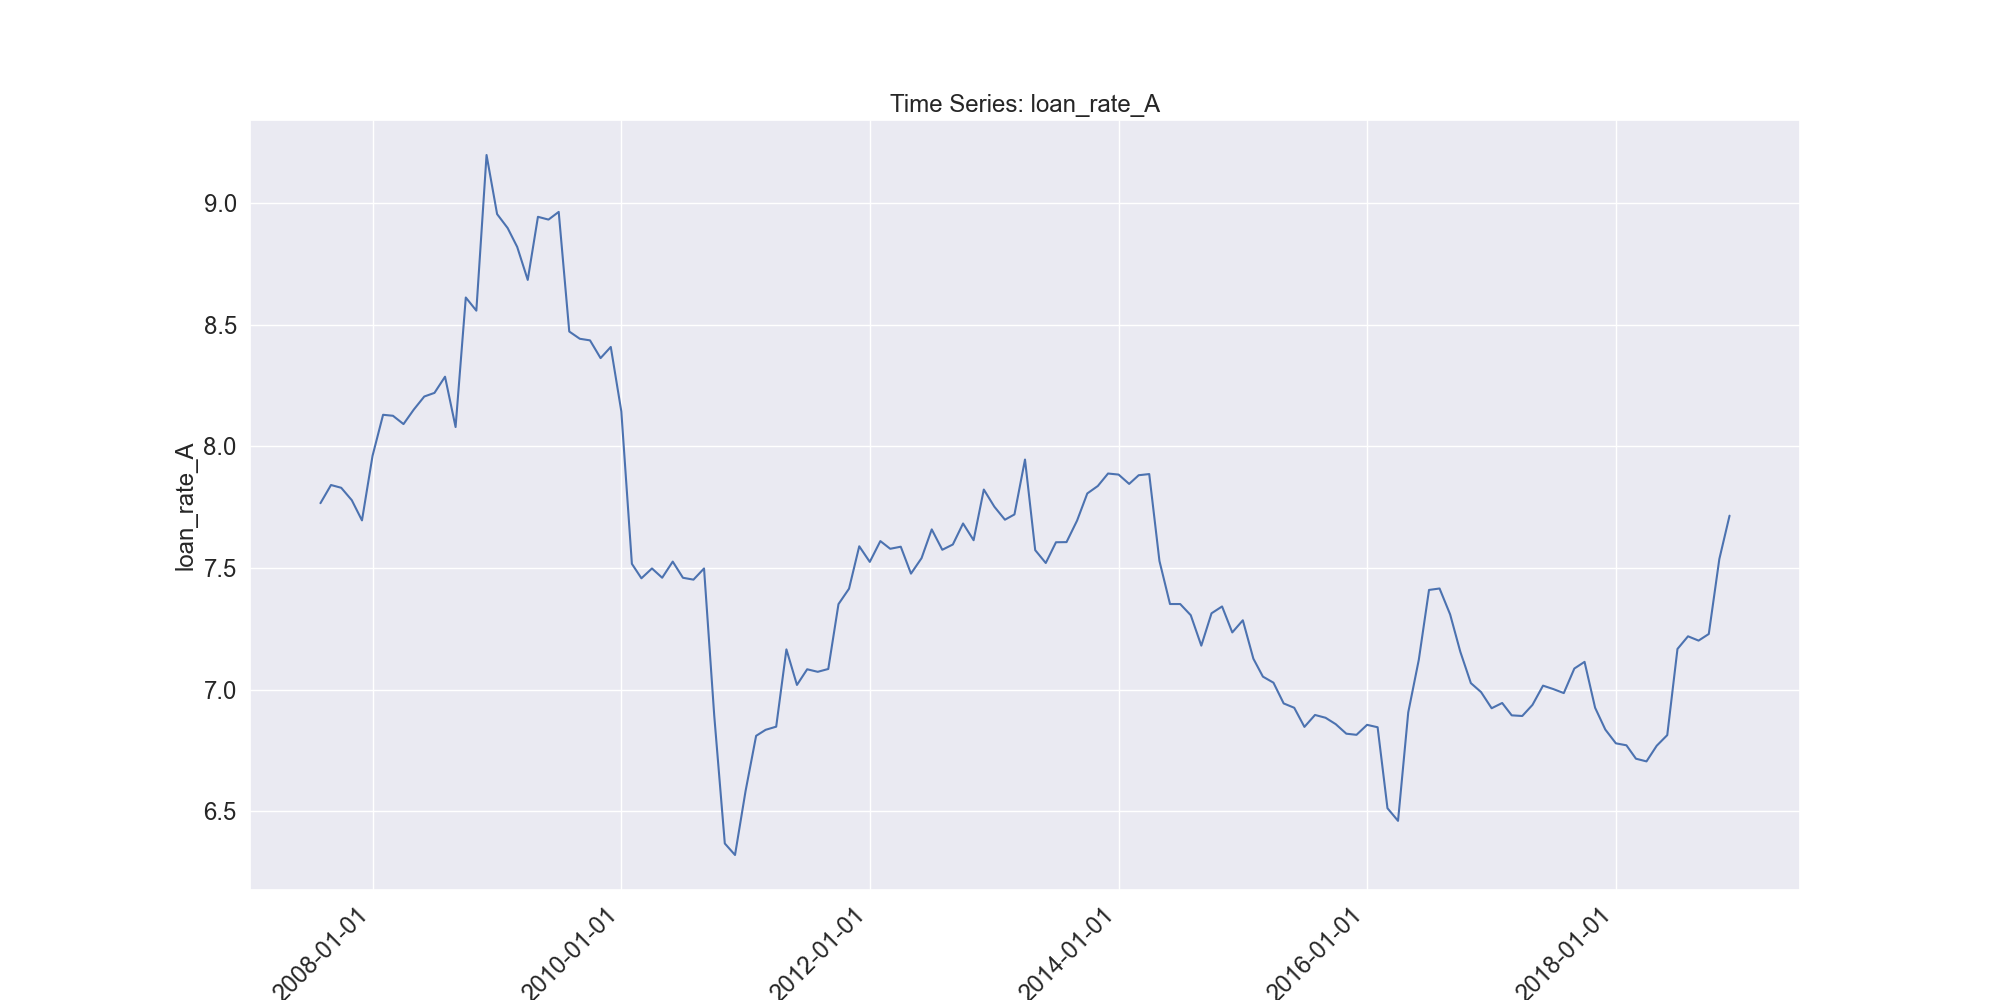
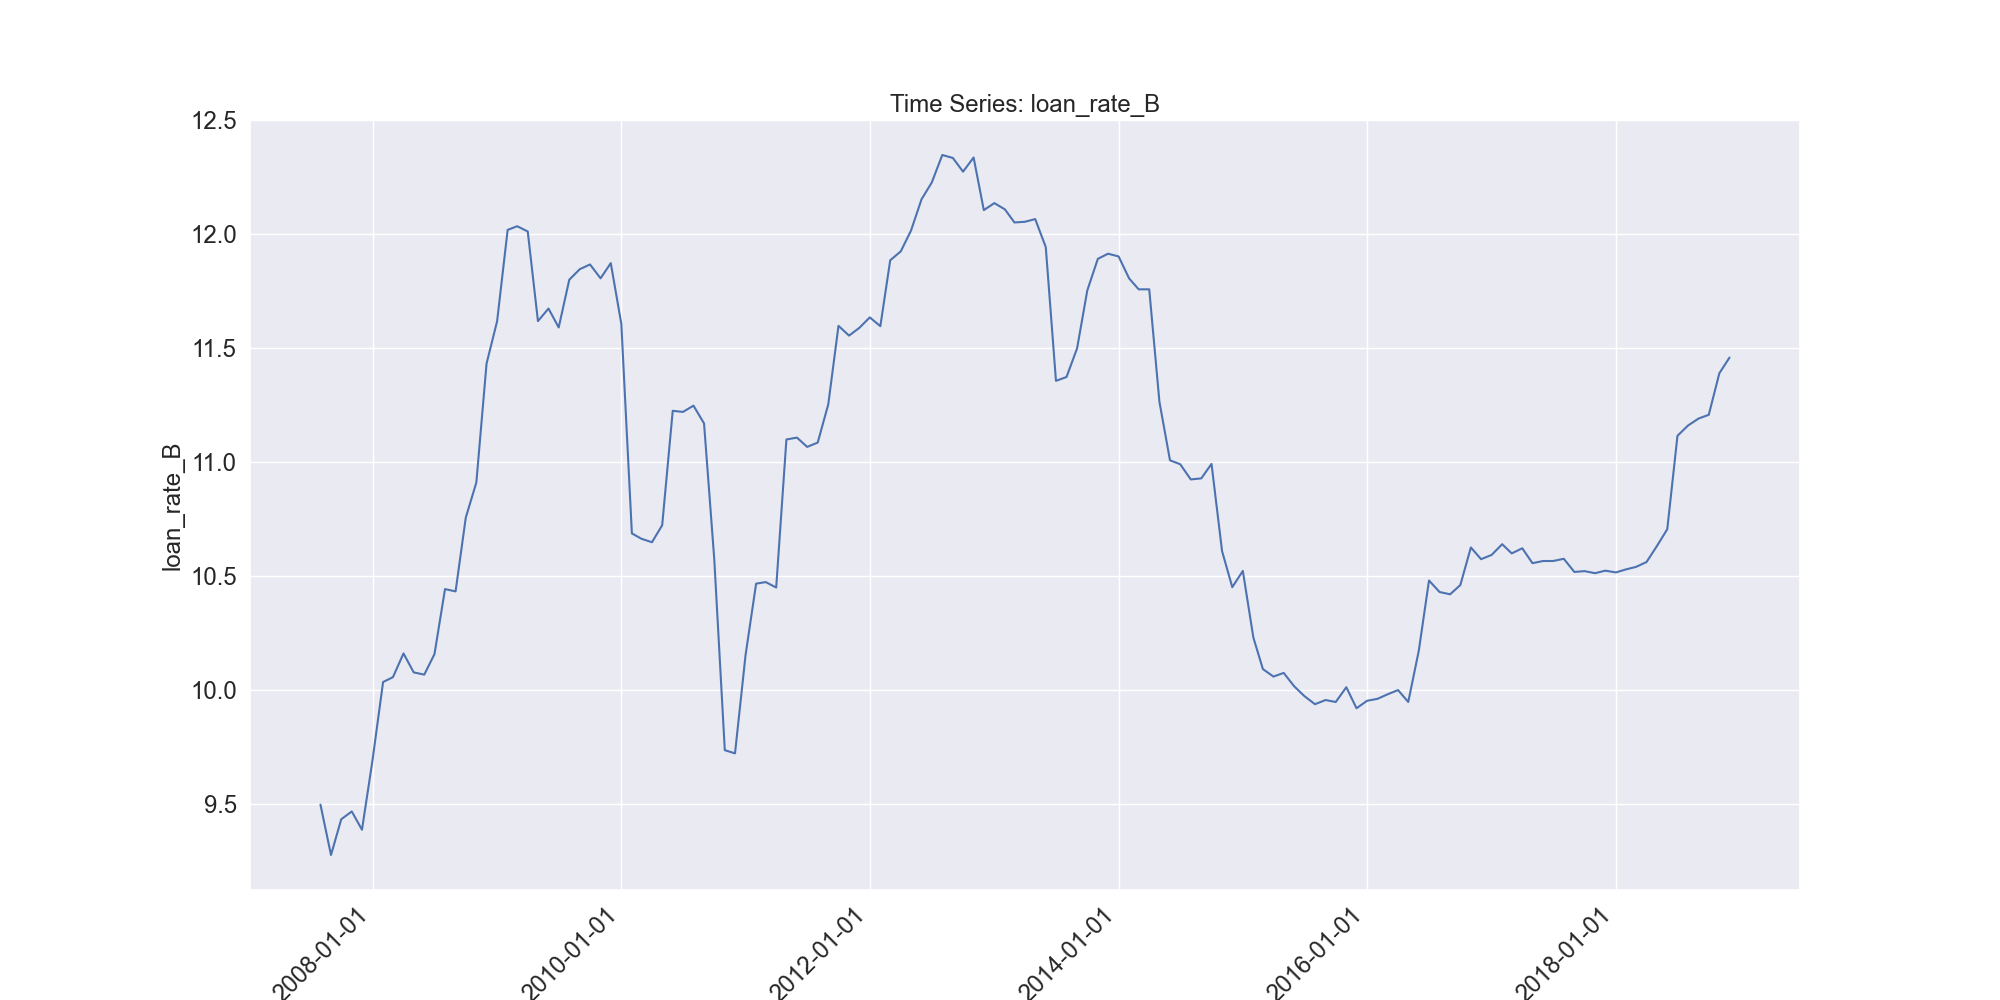
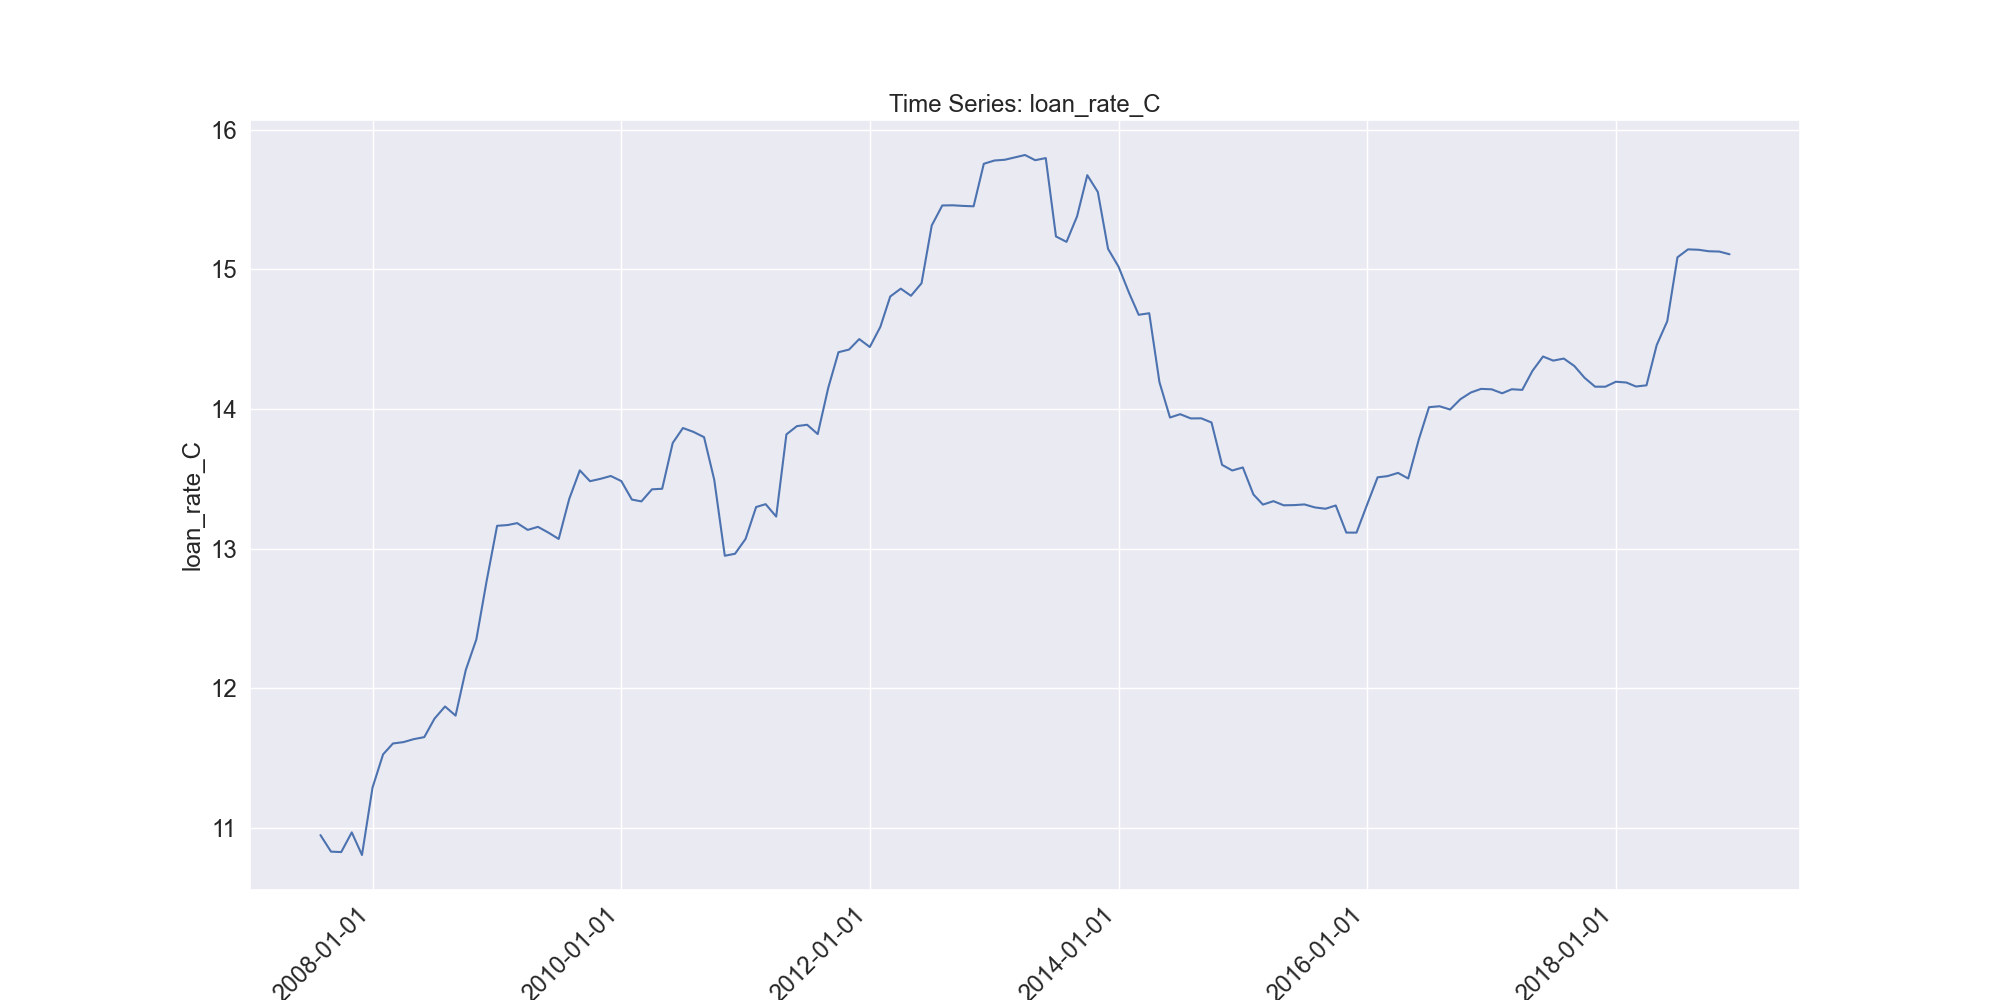
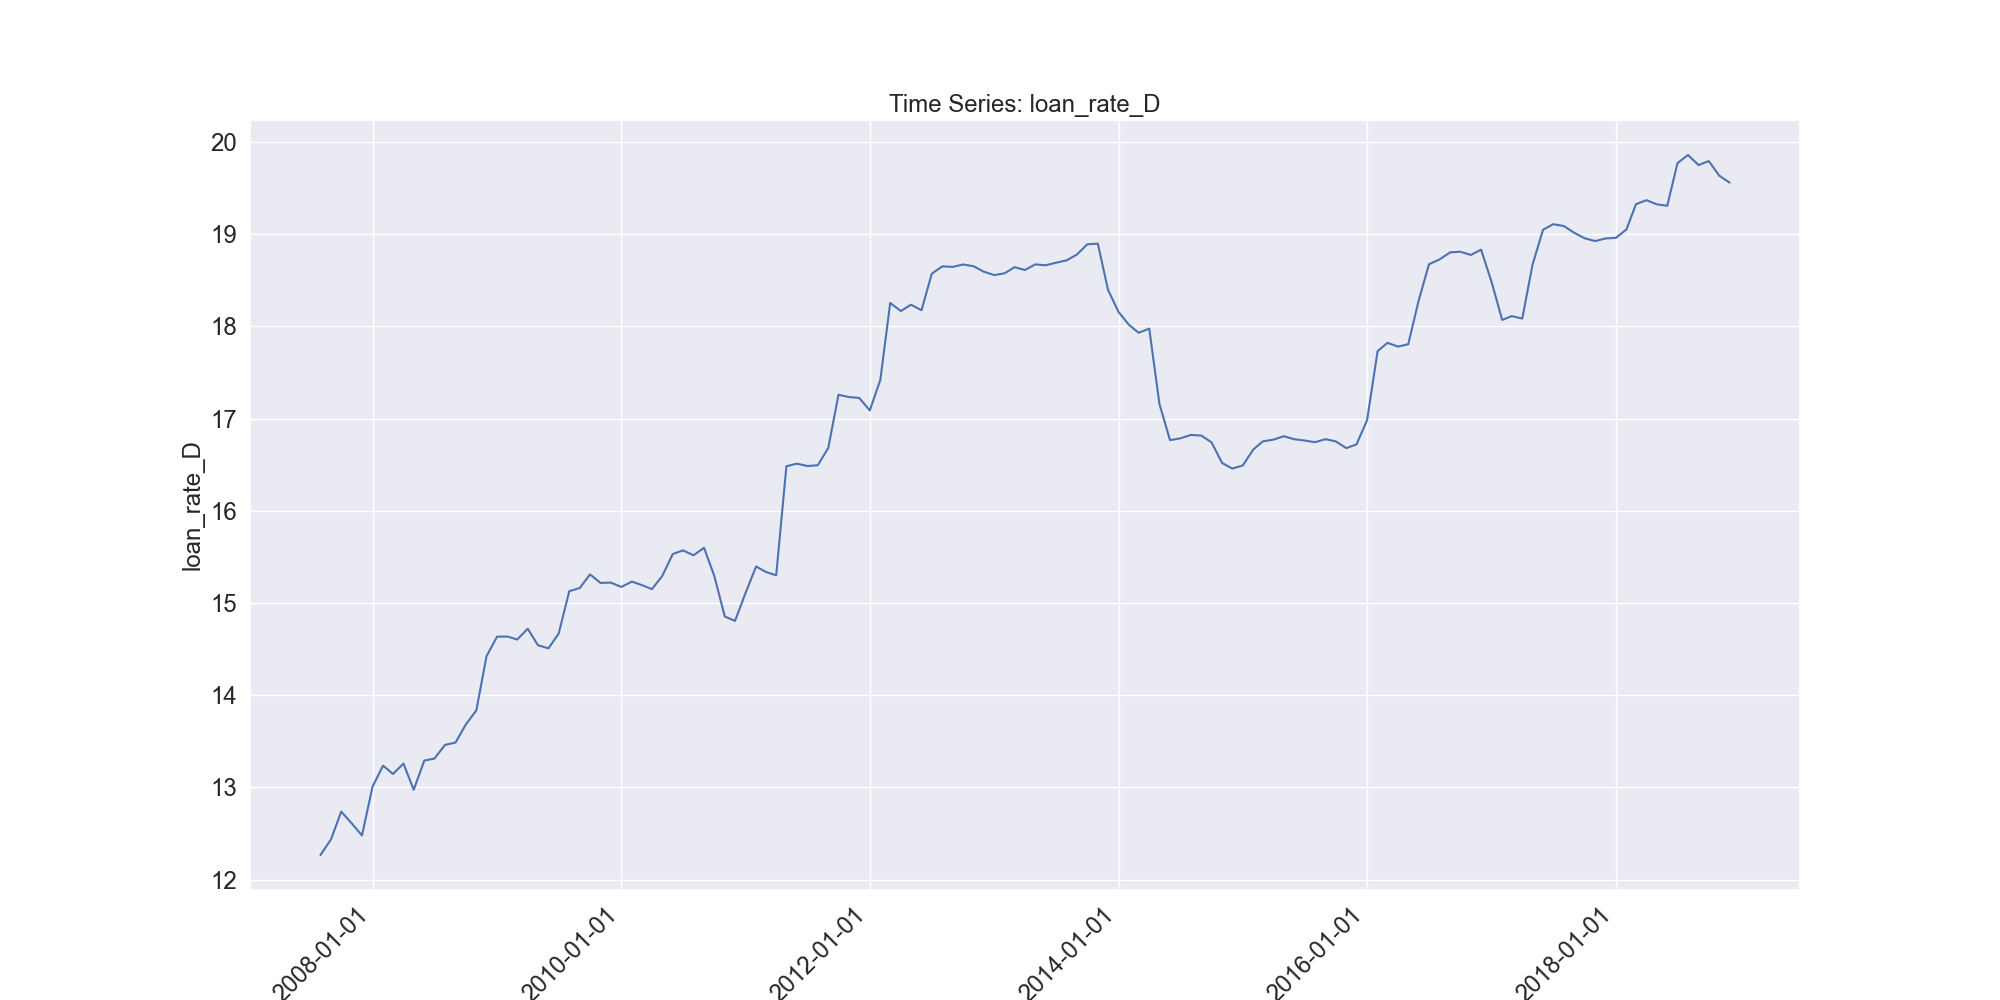
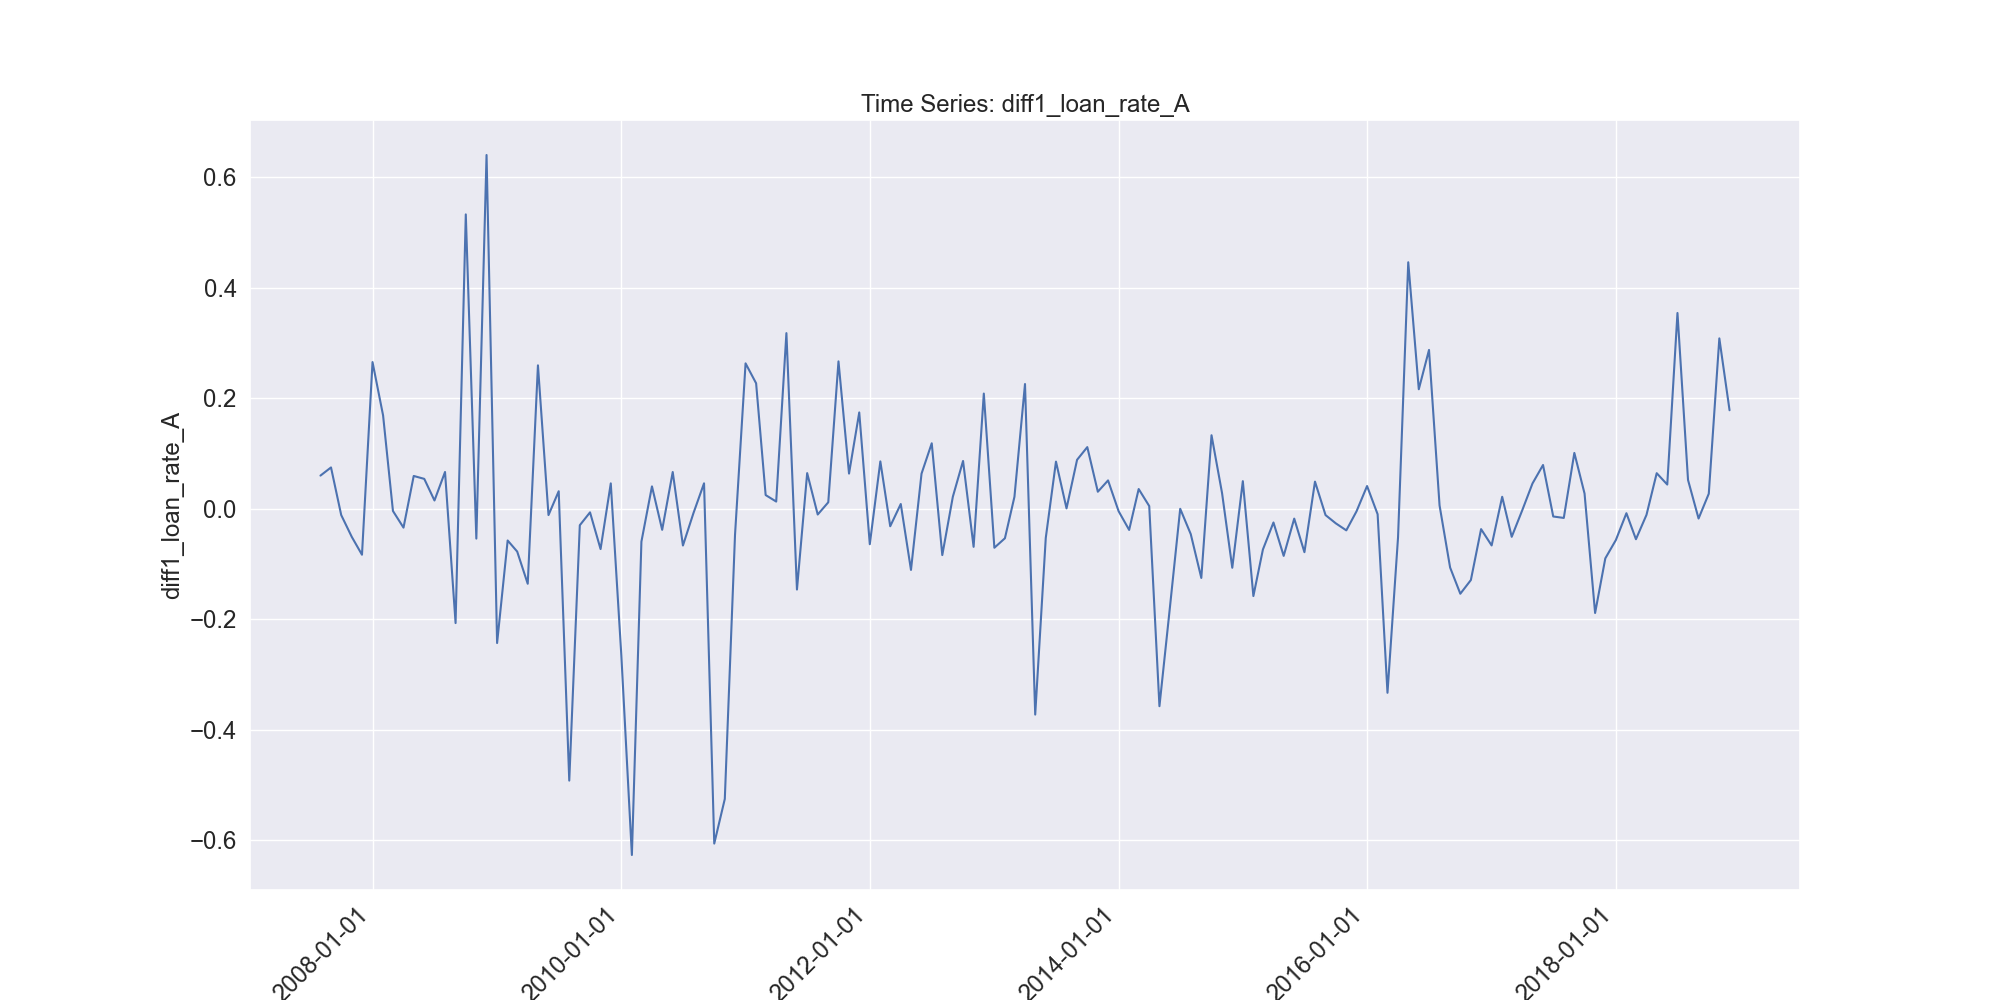
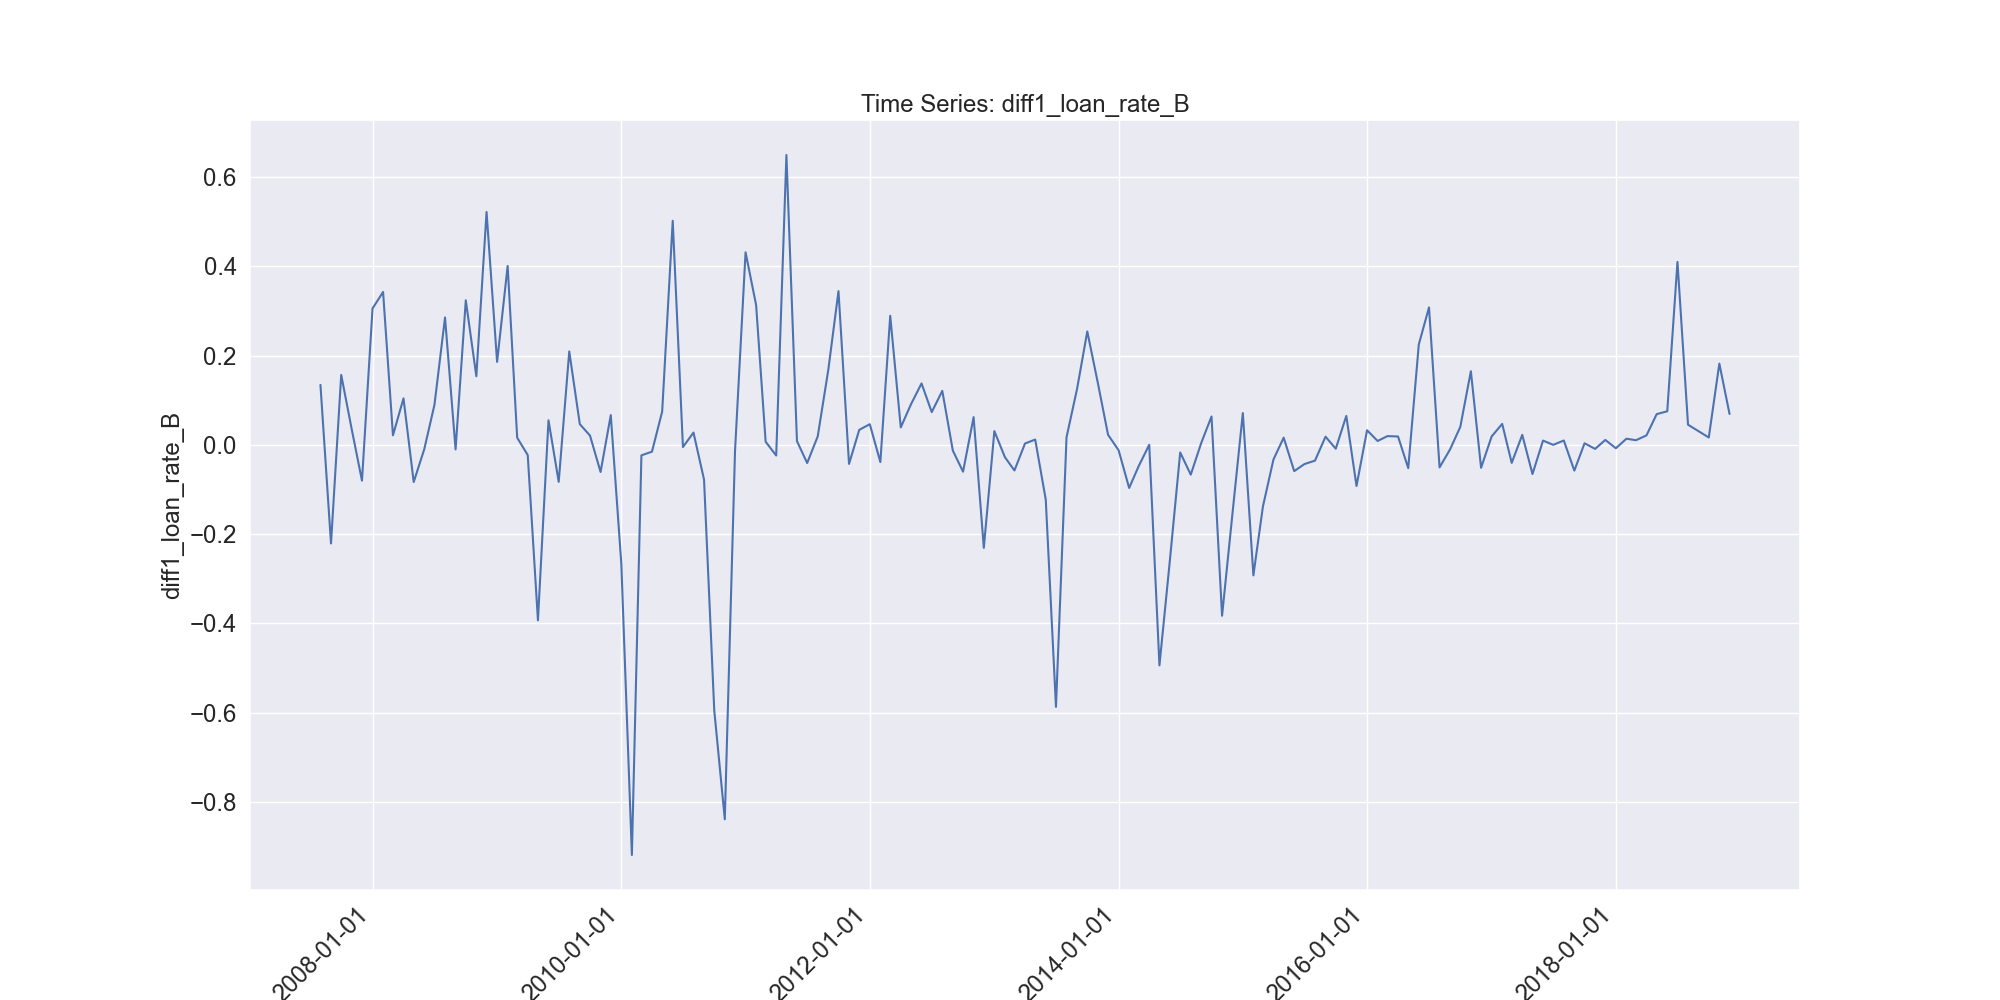
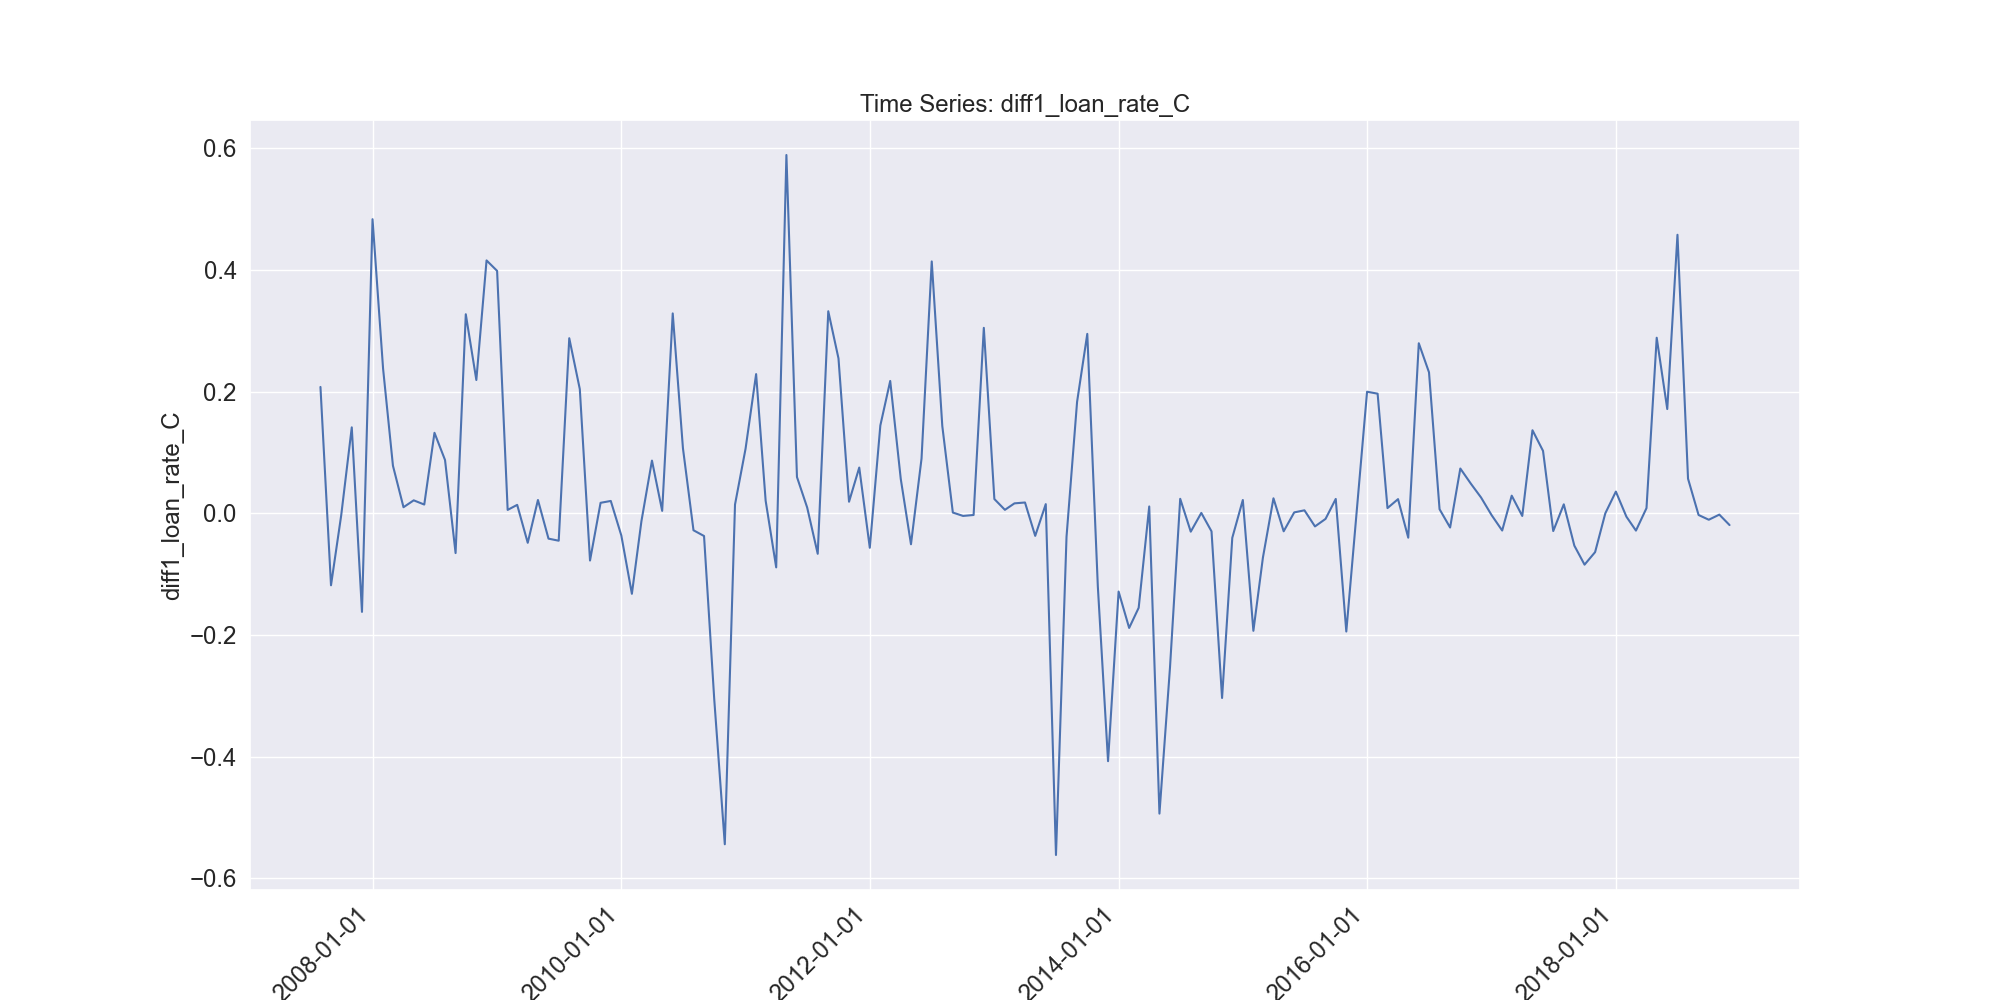
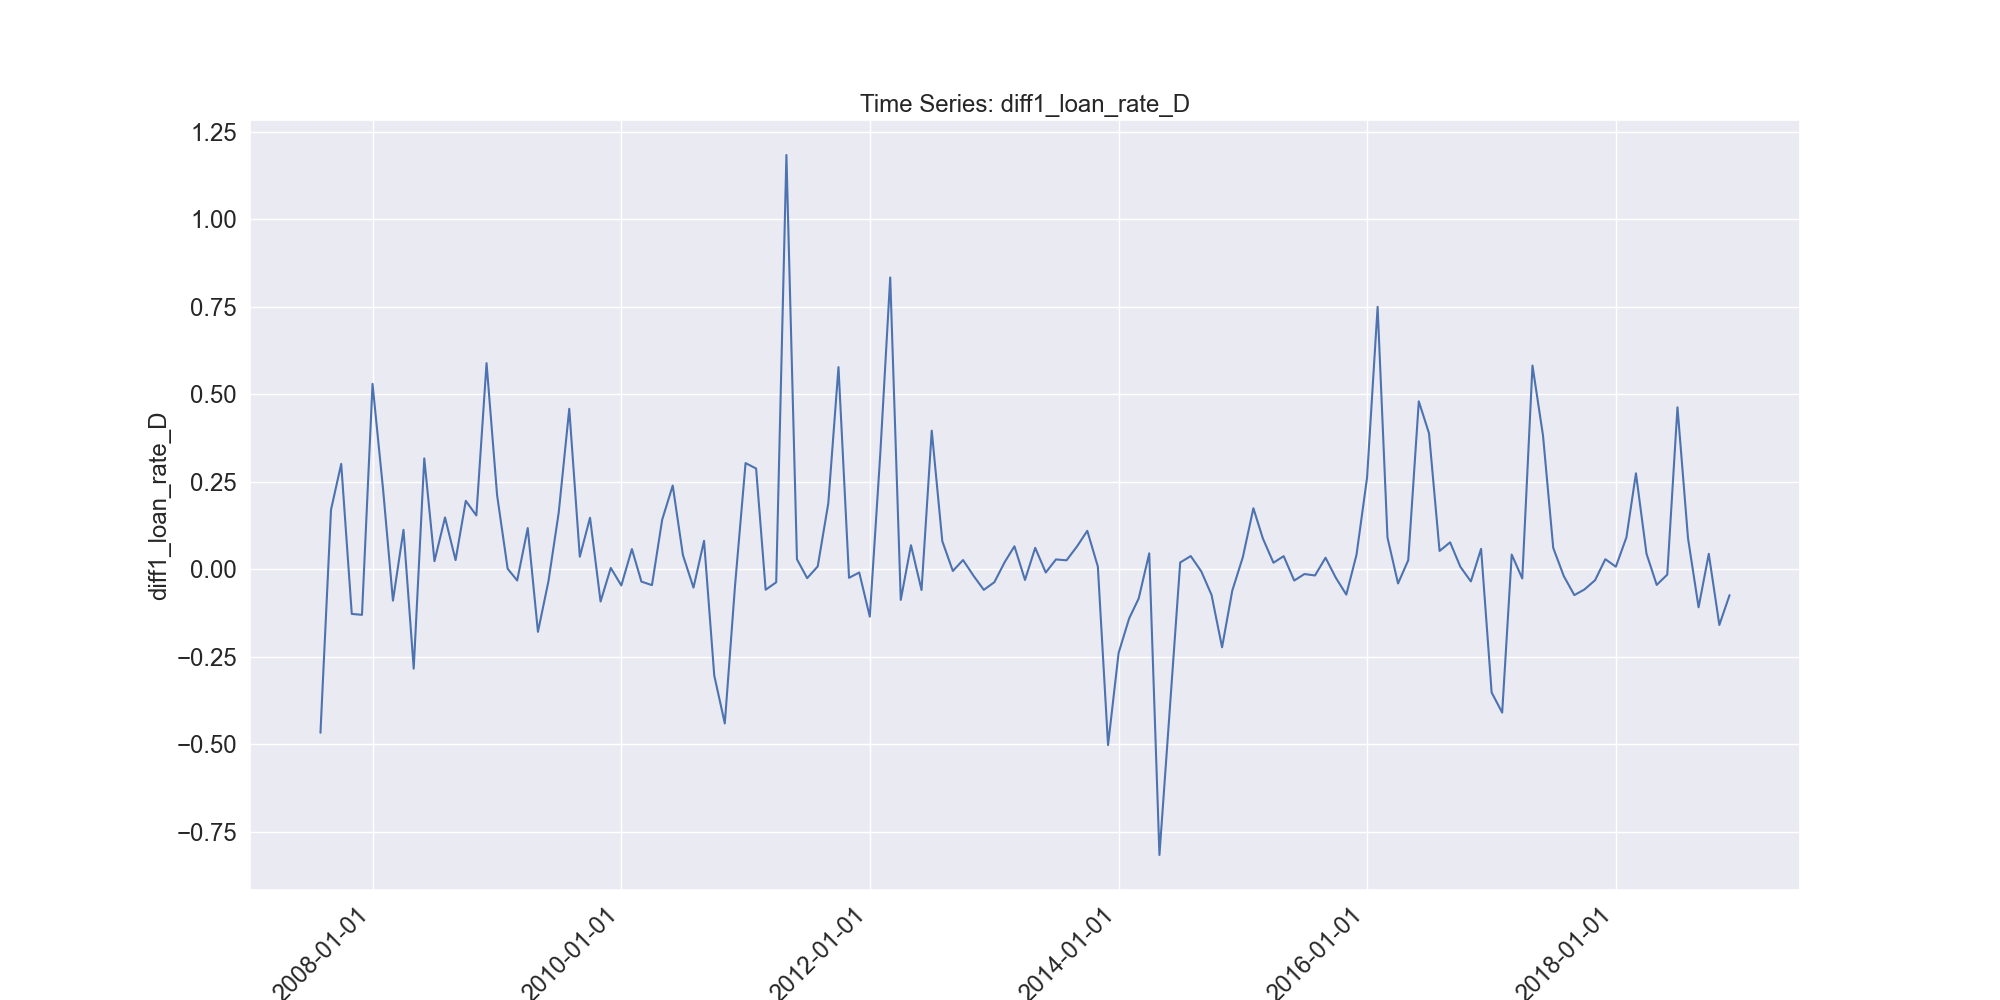

In [9]:
loan_rate_columns = ["loan_rate_A", "loan_rate_B", "loan_rate_C", "loan_rate_D"]
diff1_loan_rate_columns = ["diff1_loan_rate_A", "diff1_loan_rate_B", "diff1_loan_rate_C", "diff1_loan_rate_D"]

test_plan_config = {
    "time_series_univariate_inspection_raw": {
        "columns": loan_rate_columns + diff1_loan_rate_columns
    },
    "time_series_univariate_inspection_histogram": {
        "columns": loan_rate_columns + diff1_loan_rate_columns
    }
}

vm.run_test_plan("timeseries_univariate_inspection", config=test_plan_config, dataset=vm_dataset)